In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
import os

In [59]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [60]:
#Sample Data preview
application_df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [61]:
#count of Unique Values in different columns of application_df DataFrame
application_df.nunique()


,0
EIN,34299
NAME,19568
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2


In [62]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

application_df=application_df.drop(columns=['EIN','NAME'])
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [63]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
unique_value=application_df.nunique()
unique_value


,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [64]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE

APPLICATION_TYPE_count=application_df['APPLICATION_TYPE'].value_counts()
APPLICATION_TYPE_count


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [65]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
cutoff_value = 500
application_types_to_replace = APPLICATION_TYPE_count[APPLICATION_TYPE_count < cutoff_value].index
application_types_to_replace

# # Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [66]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
CLASSIFICATION_count=application_df['CLASSIFICATION'].value_counts()
CLASSIFICATION_count

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [67]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
CLASSIFICATION_count_greater_than_1=CLASSIFICATION_count[CLASSIFICATION_count>1]
CLASSIFICATION_count_greater_than_1

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [68]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
cutoff_value_classfication=1800
classifications_to_replace = CLASSIFICATION_count[CLASSIFICATION_count < cutoff_value_classfication].index
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [69]:
application_df.nunique()

,0
APPLICATION_TYPE,9
AFFILIATION,6
CLASSIFICATION,6
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [70]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df_encoded = pd.get_dummies(application_df, drop_first=True)


In [71]:
print(type(application_df_encoded))
print(application_df_encoded.shape)

<class 'pandas.core.frame.DataFrame'>
(34299, 37)


In [72]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X=application_df_encoded.drop(columns='IS_SUCCESSFUL',axis=1)
y=application_df_encoded[['IS_SUCCESSFUL']]


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)



In [73]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
X_train.shape

(27439, 36)

In [75]:
y_train.shape

(27439, 1)

## Compile, Train and Evaluate the Model

In [76]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.00001)))

# Dropout layer
nn.add(Dropout(0.5))



# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=29, activation='relu', kernel_regularizer=l2(0.00001)))

# third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=20, activation='relu'))


# fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))


# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 80)                  │           2,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 29)                  │           2,349 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,130 (23.95 KB)

 Trainable params: 6,130 (23.95 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Compile the model
#  YOUR CODE GOES HERE

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Create a callback that saves the model's weights every five epochs
checkpoint_path = "training_checkpoints/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*len(X_train_scaled) // 32  # Save every 5 epochs
)

In [78]:
# Train the model
#  YOUR CODE GOES HERE

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = nn.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[cp_callback, early_stopping], verbose=2)


Epoch 1/200
858/858 - 4s - 5ms/step - accuracy: 0.6256 - loss: 0.6677 - val_accuracy: 0.6962 - val_loss: 0.6225
Epoch 2/200
858/858 - 2s - 3ms/step - accuracy: 0.6953 - loss: 0.6158 - val_accuracy: 0.7124 - val_loss: 0.5874
Epoch 3/200
858/858 - 4s - 4ms/step - accuracy: 0.7086 - loss: 0.5972 - val_accuracy: 0.7181 - val_loss: 0.5788
Epoch 4/200
858/858 - 2s - 3ms/step - accuracy: 0.7129 - loss: 0.5882 - val_accuracy: 0.7195 - val_loss: 0.5747
Epoch 5/200

Epoch 5: saving model to training_checkpoints/cp-0005.weights.h5
858/858 - 2s - 3ms/step - accuracy: 0.7164 - loss: 0.5841 - val_accuracy: 0.7210 - val_loss: 0.5721
Epoch 6/200
858/858 - 2s - 3ms/step - accuracy: 0.7150 - loss: 0.5820 - val_accuracy: 0.7219 - val_loss: 0.5705
Epoch 7/200
858/858 - 3s - 3ms/step - accuracy: 0.7188 - loss: 0.5782 - val_accuracy: 0.7208 - val_loss: 0.5692
Epoch 8/200
858/858 - 3s - 4ms/step - accuracy: 0.7182 - loss: 0.5759 - val_accuracy: 0.7235 - val_loss: 0.5679
Epoch 9/200
858/858 - 3s - 3ms/step - 

In [80]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 1ms/step - accuracy: 0.7299 - loss: 0.5559
Loss: 0.5559399724006653, Accuracy: 0.7298833727836609


In [81]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("AlphabetSoupCharity.h5")


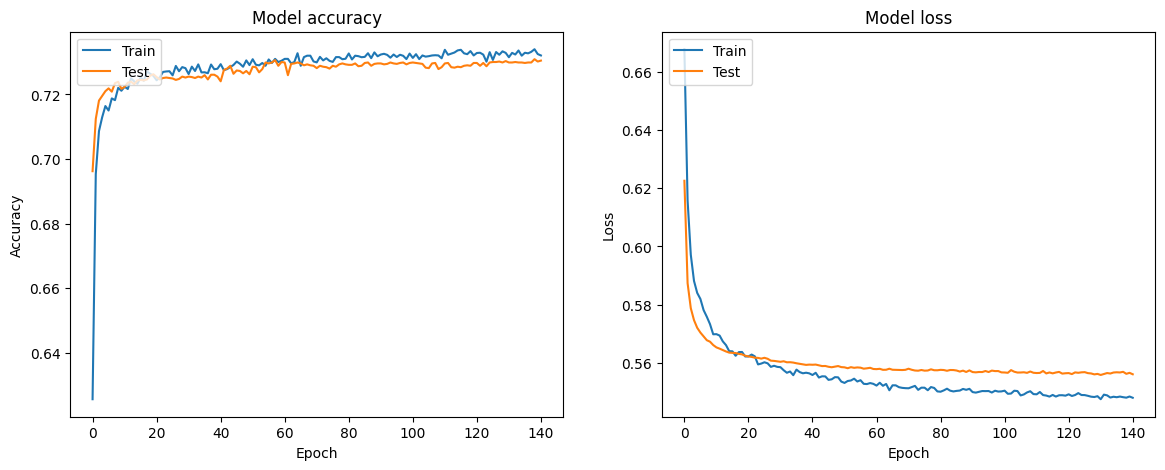

In [82]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()